<a href="https://colab.research.google.com/github/cherlhee/AI/blob/master/dron_ai_850_ytype(0808).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Download the dataset
# to clone data from github;
!git clone https://github.com/cherlhee/dron.git

Cloning into 'dron'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 58 (delta 0), reused 0 (delta 0), pack-reused 55
Receiving objects: 100% (58/58), 2.53 MiB | 5.97 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [3]:
# df = pd.read_csv('./dron/데이터 정리(2023-06-16).csv')
# df = pd.read_csv('./dron/20230601_3_2_850.csv')
# df = pd.read_csv('./dron/20230531_2_850_(1435-1441, shark).csv')
df = pd.read_csv('./dron/data_20230808_PM_850.csv')
df

,Date,Lat,Lon,Alt,S Lat,S Lon,S Alt,Distance,Power,772,850,2400,5100,Building Count
0,2023-08-08 13:57:54,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-64.51,-45.55442,-46.69045,-58.30629,-68.55348,0
1,2023-08-08 13:57:55,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.62,-45.55442,-46.69045,-58.30629,-68.55348,0
2,2023-08-08 13:57:56,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-64.10,-45.55442,-46.69045,-58.30629,-68.55348,0
3,2023-08-08 13:57:57,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.62,-45.55442,-46.69045,-58.30629,-68.55348,0
4,2023-08-08 13:57:58,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.40,-45.55442,-46.69045,-58.30629,-68.55348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2023-08-08 14:04:45,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-91.02,-45.56427,-46.70030,-58.31615,-68.56333,0
401,2023-08-08 14:04:46,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-94.78,-45.56427,-46.70030,-58.31615,-68.56333,0
402,2023-08-08 14:04:47,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-90.98,-45.56427,-46.70030,-58.31615,-68.56333,0
403,2023-08-08 14:04:48,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-91.01,-45.56427,-46.70030,-58.31615,-68.56333,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            405 non-null    object 
 1   Lat             405 non-null    float64
 2   Lon             405 non-null    float64
 3   Alt             405 non-null    float64
 4   S Lat           405 non-null    float64
 5   S Lon           405 non-null    float64
 6   S Alt           405 non-null    float64
 7   Distance        405 non-null    float64
 8   Power           405 non-null    float64
 9   772             405 non-null    float64
 10  850             405 non-null    float64
 11  2400            405 non-null    float64
 12  5100            405 non-null    float64
 13  Building Count  405 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 44.4+ KB


In [5]:
df.describe()

,Lat,Lon,Alt,S Lat,S Lon,S Alt,Distance,Power,772,850,2400,5100,Building Count
count,405.000000,405.000000,405.000000,4.050000e+02,4.050000e+02,405.0,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.0
mean,36.350841,127.349238,107.108148,3.635032e+01,1.273514e+02,45.5,224.443508,-53.744000,-45.175500,-46.311529,-57.927373,-68.174559,0.0
std,0.000652,0.000265,42.461748,7.114216e-15,2.845686e-14,0.0,20.282426,10.313269,0.844451,0.844451,0.844451,0.844450,0.0
min,36.349329,127.349056,48.000000,3.635032e+01,1.273514e+02,45.5,173.352400,-94.780000,-46.258960,-47.394990,-59.010830,-69.258020,0.0
25%,36.350478,127.349070,53.200000,3.635032e+01,1.273514e+02,45.5,223.420700,-60.090000,-45.576070,-46.712100,-58.327940,-68.575130,0.0
50%,36.351155,127.349116,127.700000,3.635032e+01,1.273514e+02,45.5,233.348900,-50.740000,-45.552460,-46.688480,-58.304330,-68.551510,0.0
75%,36.351313,127.349215,146.500000,3.635032e+01,1.273514e+02,45.5,233.984200,-46.770000,-45.174810,-46.310840,-57.926680,-68.173870,0.0
max,36.351327,127.349801,148.400000,3.635032e+01,1.273514e+02,45.5,253.122700,-38.110000,-42.970940,-44.106970,-55.722810,-65.970000,0.0


In [6]:
df['Distance'].value_counts()

233.4017    51
233.6665    23
252.9572     5
252.9361     2
233.4415     2
            ..
176.7495     1
177.3715     1
178.1340     1
178.8566     1
233.5692     1
Name: Distance, Length: 326, dtype: int64

In [7]:
df.dropna()

,Date,Lat,Lon,Alt,S Lat,S Lon,S Alt,Distance,Power,772,850,2400,5100,Building Count
0,2023-08-08 13:57:54,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-64.51,-45.55442,-46.69045,-58.30629,-68.55348,0
1,2023-08-08 13:57:55,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.62,-45.55442,-46.69045,-58.30629,-68.55348,0
2,2023-08-08 13:57:56,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-64.10,-45.55442,-46.69045,-58.30629,-68.55348,0
3,2023-08-08 13:57:57,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.62,-45.55442,-46.69045,-58.30629,-68.55348,0
4,2023-08-08 13:57:58,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.40,-45.55442,-46.69045,-58.30629,-68.55348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2023-08-08 14:04:45,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-91.02,-45.56427,-46.70030,-58.31615,-68.56333,0
401,2023-08-08 14:04:46,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-94.78,-45.56427,-46.70030,-58.31615,-68.56333,0
402,2023-08-08 14:04:47,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-90.98,-45.56427,-46.70030,-58.31615,-68.56333,0
403,2023-08-08 14:04:48,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-91.01,-45.56427,-46.70030,-58.31615,-68.56333,0


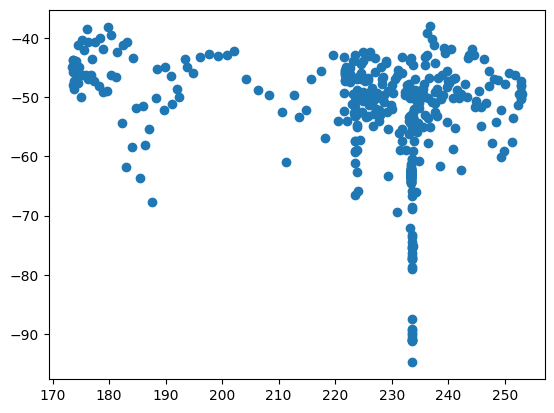

In [8]:
x = df['Distance']
y = df['Power']

# sns.lineplot(x=df['Distance'], y=df['Power'])

plt.scatter(x,y)
# plt.xlabel('diatance')
# plt.ylabel('power')




In [9]:
ymean = np.mean(y)
print('mean;', ymean)
ystd = np.std(y)
print('std;', ystd)

mean; -53.744
std; 10.300528875310777


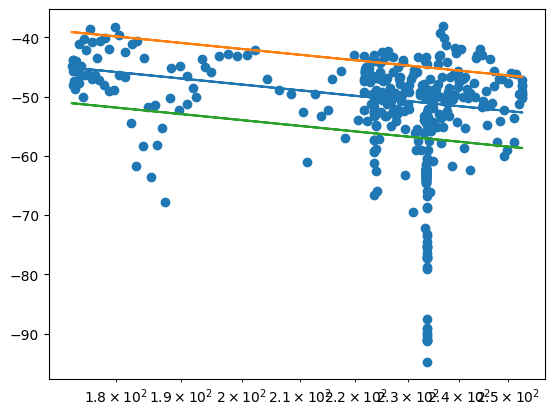

In [10]:
x = df['Distance']
y = df['Power']

plt.xscale("log")
plt.scatter(x,y)




offset = 58
fsloss = -20*np.log(x) + offset
fsloss6p = -20*np.log(x) + offset + 6
fsloss6m = -20*np.log(x) + offset - 6

plt.xscale("log")
plt.plot(x, fsloss)
plt.plot(x, fsloss6p)
plt.plot(x, fsloss6m)



In [11]:
# to count the number of out-of-range-data;

numrows = len(df['Power'])
# print(numrows)

rowsize = df.shape[0]
# print(rowsize)




# initial variable for counting;
num_uprange = 0
num_unrange = 0

for i in range(rowsize):
  pwr = df.loc[i, 'Power']
  print(pwr)

  if pwr > fsloss6p[i]:
    num_uprange += 1

    print('located upper range,', num_uprange)

  elif pwr < fsloss6m[i]:
    num_unrange += 1
    print('located lower range', num_unrange)


# to calculate total number of outofrange;
outofrange = num_unrange + num_uprange
print(outofrange)

rate_outofrange = outofrange/rowsize
rate_inrange = 1 - rate_outofrange
print('in range;', rate_inrange)

-64.51
located lower range 1
-63.62
located lower range 2
-64.1
located lower range 3
-63.62
located lower range 4
-63.4
located lower range 5
-64.41
located lower range 6
-64.21
located lower range 7
-64.56
located lower range 8
-63.2
located lower range 9
-61.98
located lower range 10
-63.58
located lower range 11
-62.25
located lower range 12
-62.42
located lower range 13
-62.79
located lower range 14
-61.7
located lower range 15
-62.45
located lower range 16
-62.67
located lower range 17
-63.22
located lower range 18
-63.47
located lower range 19
-63.15
located lower range 20
-63.12
located lower range 21
-62.43
located lower range 22
-62.4
located lower range 23
-62.29
located lower range 24
-62.16
located lower range 25
-63.05
located lower range 26
-62.67
located lower range 27
-62.82
located lower range 28
-63.27
located lower range 29
-62.16
located lower range 30
-61.38
located lower range 31
-62.18
located lower range 32
-62.62
located lower range 33
-62.53
located lower ran

to calculate median values;

In [12]:
numRows = len(df['Distance'])
print('number of rows;', numRows)

rowSize = df.shape[0]
print('row size;', rowSize)



# //////////////////////////////////////////////////
# to set first location to reference position;
# ///////////////////////////////////////////////////
# r0 = df.iloc[0]['Distance']
r0 = df['Distance'].min()
print('r0;', r0)







for i in range(numRows):
  r = df.iloc[i]['Distance']
  # print('r;', r)


  # to calculate cell regions;
  # numCellregion = (r - r0)/5
  # print('number of cell region;', numCellregion)



  # to calculate quotient;
  numCellRegion = (r - r0)//5
  print('number of cell region;', numCellRegion)

  # print('ith;', i)
  df.loc[i, 'CellRegion'] = numCellRegion


df.to_csv('dataframe.csv')
df

number of rows; 405
row size; 405
r0; 173.3524
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
number of cell region; 12.0
n

,Date,Lat,Lon,Alt,S Lat,S Lon,S Alt,Distance,Power,772,850,2400,5100,Building Count,CellRegion
0,2023-08-08 13:57:54,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-64.51,-45.55442,-46.69045,-58.30629,-68.55348,0,12.0
1,2023-08-08 13:57:55,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.62,-45.55442,-46.69045,-58.30629,-68.55348,0,12.0
2,2023-08-08 13:57:56,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-64.10,-45.55442,-46.69045,-58.30629,-68.55348,0,12.0
3,2023-08-08 13:57:57,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.62,-45.55442,-46.69045,-58.30629,-68.55348,0,12.0
4,2023-08-08 13:57:58,36.351324,127.349071,48.1,36.350316,127.351399,45.5,233.4017,-63.40,-45.55442,-46.69045,-58.30629,-68.55348,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2023-08-08 14:04:45,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-91.02,-45.56427,-46.70030,-58.31615,-68.56333,0,12.0
401,2023-08-08 14:04:46,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-94.78,-45.56427,-46.70030,-58.31615,-68.56333,0,12.0
402,2023-08-08 14:04:47,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-90.98,-45.56427,-46.70030,-58.31615,-68.56333,0,12.0
403,2023-08-08 14:04:48,36.351327,127.349069,48.1,36.350316,127.351399,45.5,233.6665,-91.01,-45.56427,-46.70030,-58.31615,-68.56333,0,12.0


<Axes: xlabel='CellRegion'>

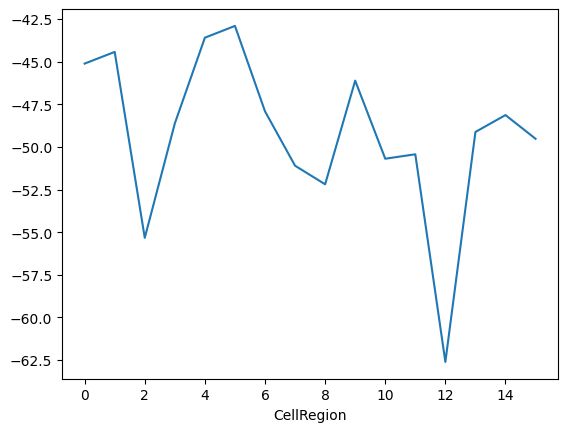

In [13]:
median = df.groupby('CellRegion')['Power'].median()
# print(median)
median.to_csv('median.csv')



df.groupby('CellRegion')['Power'].median().plot(kind='line')
# df.groupby('CellRegion')['Power'].mean().plot(kind='box')

<Axes: xlabel='CellRegion'>

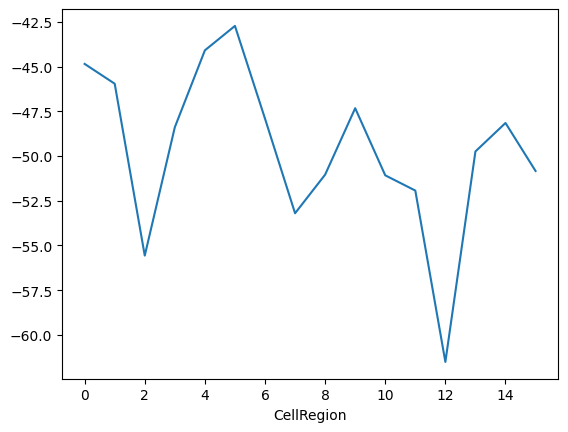

In [14]:
df.groupby('CellRegion')['Power'].mean().plot(kind='line')

In [15]:
dfm = pd.read_csv('median.csv')
# dfm = pd.DataFrame(median)

dfm

# dfm['CellRegion']
# dfm['Power']


,CellRegion,Power
0,0.0,-45.110
1,1.0,-44.425
2,2.0,-55.330
3,3.0,-48.620
4,4.0,-43.590
5,5.0,-42.900
6,6.0,-47.910
7,7.0,-51.100
8,8.0,-52.190
9,9.0,-46.110


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CellRegion  16 non-null     float64
 1   Power       16 non-null     float64
dtypes: float64(2)
memory usage: 384.0 bytes


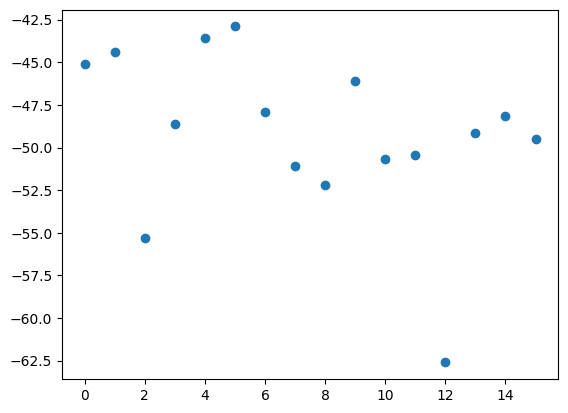

In [16]:
dfm.info()
dfm.size
plt.scatter(dfm['CellRegion'], dfm['Power'])

In [17]:
# plt.scatter(dfm['CellRegion']+5, dfm['Power'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


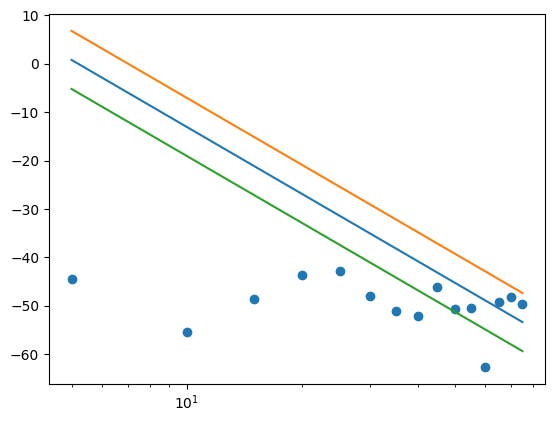

In [18]:
# xlog = 30 + dfm['CellRegion']*5
xlog = dfm['CellRegion']*5




# to set offset;
offset = 33
fsloss = -20*np.log(xlog) + offset
fsloss6p = -20*np.log(xlog) + offset + 6
fsloss6m = -20*np.log(xlog) + offset - 6


plt.xscale("log")
plt.plot(xlog, fsloss)
plt.plot(xlog, fsloss6p)
plt.plot(xlog, fsloss6m)

plt.xscale("log")
plt.scatter(xlog, dfm['Power'])




In [19]:

# to count the number of out-of-range-data;

numrows = len(dfm['Power'])
# print(numrows)

rowsize = dfm.shape[0]
# print(rowsize)




# initial variable for counting;
num_upperrange = 0
num_underrange = 0

for i in range(numrows):
  pwr = dfm.loc[i, 'Power']
  print(pwr)

  if pwr > fsloss6p[i]:
    num_upperrange += 1

    print('located upper range,', num_upperrange)

  elif pwr < fsloss6m[i]:
    num_underrange += 1
    print('located lower range', num_underrange)


# to calculate total number of outofrange;
outofrange = num_underrange + num_upperrange
print(outofrange)

rate_outofrange = outofrange/numrows
rate_inrange = 1 - rate_outofrange
print(rate_inrange)


-45.11
located lower range 1
-44.425
located lower range 2
-55.33
located lower range 3
-48.62
located lower range 4
-43.59
located lower range 5
-42.9
located lower range 6
-47.91
located lower range 7
-51.1
located lower range 8
-52.19
located lower range 9
-46.11
-50.69
-50.43000000000001
-62.61
located lower range 10
-49.12
-48.13
-49.52
10
0.375


#to draw lines of linear regression

In [20]:
# X = df[['Distance']]
# print('X;', X)

# y = df['Power']
# print('y;', y)

# plt.scatter(X, y)

X;      Distance
70   223.4576
71   223.4003
72   223.4904
73   223.4532
74   223.3067
..        ...
275  229.2336
276  230.0894
277  230.8472
278  231.7715
279  232.7308

[210 rows x 1 columns]
y; 70    -52.84
71    -52.72
72    -50.74
73    -50.86
74    -49.54
       ...  
275   -52.49
276   -48.00
277   -46.41
278   -45.88
279   -48.06
Name: Power, Length: 210, dtype: float64


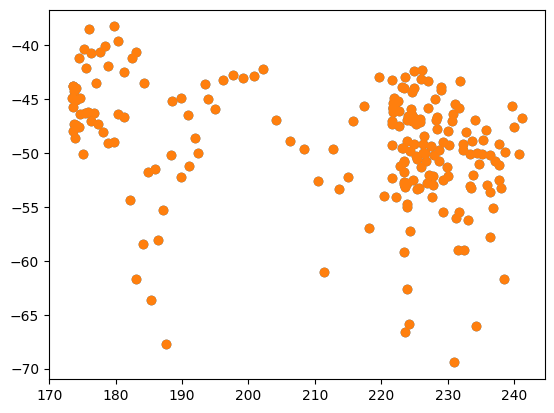

In [21]:
xdf = df[['Distance']].iloc[70:280]


ydf = df['Power'].iloc[70:280]
ydf

plt.scatter(xdf, ydf)


X = xdf
# X = df[['Distance']]
print('X;', X)

y = ydf
# y = df['Power']
print('y;', y)

plt.scatter(X, y)

In [22]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
r_square = model.score(X, y)
print('r2;', r_square)

r2; 0.09944152769809123


In [24]:
print('coefficient;', model.coef_)

print('intercept;', model.intercept_)

coefficient; [-0.0789987]
intercept; -32.33726282770222


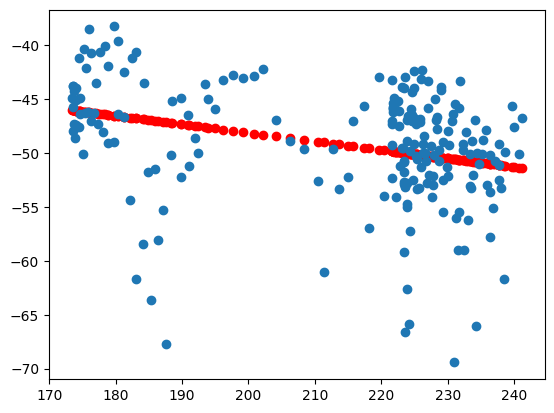

In [25]:
y_pred = model.predict(X)

plt.scatter(X, y_pred, color='r')
plt.scatter(X, y)

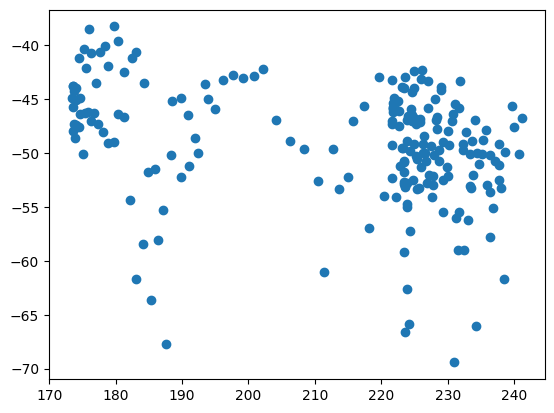

In [26]:
# xdf = df[['Distance']]
xdf = df[['Distance']].iloc[70:280]

xdf
ydf = df['Power'].iloc[70:280]
ydf

plt.scatter(xdf, ydf)